80-381.jpg
0: 5chf
1: 2chf
2: 1chf
3: 0.5chf
4: 0.2chf
5: 0.1chf
6: 0.05chf
7: 2eur
8: 1eur
9: 0.5eur
10: 0.2eur
11: 0.1eur
12: 0.05eur
13: 0.02eur
14: 0.01eur
15: odd


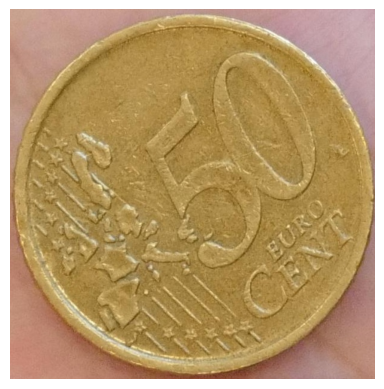

In [6]:
import cv2
import os
import json
import matplotlib.pyplot as plt
from IPython.display import clear_output
dataset = 3
path = f"output-{dataset}"

# Load all the image in output folder

possible_value = ["5chf", "2chf", "1chf", "0.5chf", "0.2chf", "0.1chf", "0.05chf", "2eur", "1eur", "0.5eur", "0.2eur", "0.1eur", "0.05eur", "0.02eur", "0.01eur", "odd"]
print(len(possible_value))
images_json = []

# Load json
if os.path.exists(f"data-{dataset}.json"):
    with open(f"data-{dataset}.json", "r") as f:
        images_json = json.load(f)


for filename in sorted(os.listdir(path)):
    if(filename.endswith(".json")):
        continue
    if(filename in [img["filename"] for img in images_json]):
        print("Already annotated")
        continue
    print(filename)
    for i in range(len(possible_value)):
        print(f"{i}: {possible_value[i]}")
    img = cv2.imread(f"{path}/{filename}", cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    result = input("Value of coin :")
    if result == "q":
        break
    if result == "":
        break
    if int(result) < 0 or int(result) >= len(possible_value):
        print("invalid value")
        break
    else:
        images_json.append({"filename": filename, "value": result})
    clear_output(wait=True)

with open(f"data-{dataset}.json", "w") as f:
    json.dump(images_json, f, indent=4)
    

In [7]:
from torchvision.models import resnet50, ResNet50_Weights

# Old weights with accuracy 76.130%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
resnet50(weights=None)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/lipefree/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
86.7%


KeyboardInterrupt: 